# Morphology and segmentation

## Load images and their masks

**Get lesion images and their "ground truth" masks** (in practice, these are gold standard masks, but ground truth is still more common terminology)

(np.float64(-0.5), np.float64(3023.5), np.float64(1499.5), np.float64(-0.5))

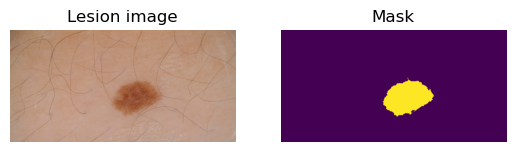

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Load an image and ground truth
file_im = 'ISIC_0001769.jpg'
file_gt = 'ISIC_0001769_segmentation.png'

im = plt.imread(file_im)
im = im[0:1500,:,:]  #cropping just for this example

gt = plt.imread(file_gt)
gt = gt[0:1500,:]  #cropping just for this example

plt.subplot(1, 2, 1)
plt.imshow(im)
plt.title("Lesion image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(gt)
plt.title("Mask")
plt.axis('off')

## Simple segmentation

Create a simple mask of the original image, for example by inspecting the intensity histogram and choosing a threshold value, or by using another method from skimage. View the ground truth (your mask) and your result (thresholded mask) together. 

**Hint**: for basic thresholding use ***plt.hist()*** function

**For advanced skimage thresholding check** [documentation](https://scikit-image.org/docs/0.23.x/auto_examples/segmentation/plot_thresholding.html)

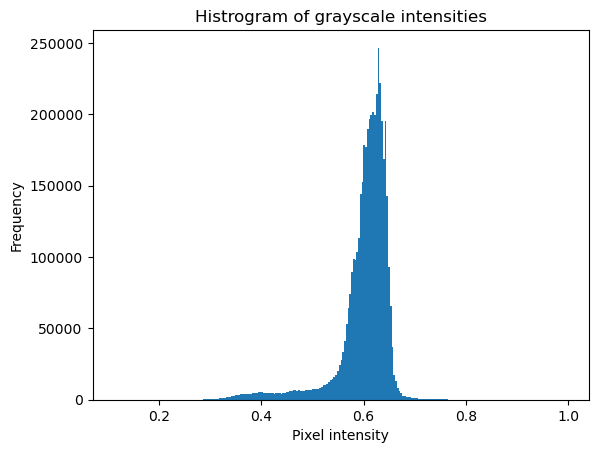

Otsu threshold:0.5254876393995098


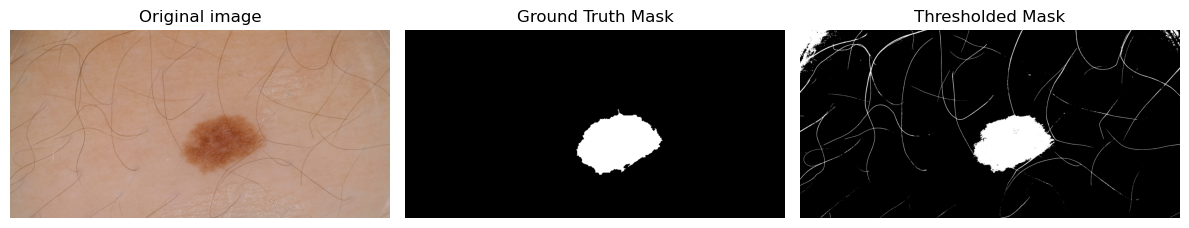

In [ ]:
## YOUR SOLUTION
from skimage.color import rgb2gray
from skimage.filters import gaussian, threshold_otsu

# Creating a mask using tresholding

# 1. Convert image to grayscale
gray = rgb2gray(im)
# 2. Plot the histogram of pixel values in the grayscale image im256 to determine a suitable threshold for segmentation
plt.figure()
plt.hist(gray.ravel(), bins=256)
plt.title("Histrogram of grayscale intensities")
plt.xlabel("Pixel intensity")
plt.ylabel("Frequency")
plt.show()

thresh = threshold_otsu(gray) # low Otsu = very dark, high Otsu = very light
print(f"Otsu threshold:{thresh}")
# 3. Create a binary mask by applying the threshold value to the grayscale image
mask = gray < thresh
# 4. Display original, mask and ground truth images
plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
plt.imshow(im)
plt.title("Original image")
plt.axis('off')

plt.subplot(1,3,2)
plt.imshow(gt, cmap='gray')
plt.title("Ground Truth Mask")
plt.axis('off')

plt.subplot(1,3,3)
plt.imshow(mask, cmap='gray')
plt.title("Thresholded Mask")
plt.axis('off')

plt.tight_layout()
plt.show()

## Evaluation
Let's look at evaluating segmentations.

For **Dice**, in ***skimage.metrics*** there is actually not a direct implementation, but we can easy calculate it ourselves as below.

You should put this into a function since you will be using it more often.

**Dice formula reminder**:

$$
\text{Dice} = \frac{2 |A \cap B|}{|A| + |B|}
$$

In [14]:
# YOUR CODE HERE

def calculate_dice(mask, gt):
    mask = mask.astype(bool)
    gt = gt.astype(bool)

    intersection = np.logical_and(mask, gt).sum()

    dice = 2. * intersection / (mask.sum() + gt.sum())

    return dice

calculate_dice(mask, gt)


np.float64(0.7241459323136381)

## Morphology

Below is an example of creating a kernel or structural element with skimage. Read the [documentation](https://scikit-image.org/docs/stable/api/skimage.morphology.html) of the function to get an idea what kind of parameters are possible.

[[0 0 0 0 0 0 1 0 0 0 0 0 0]
 [0 0 0 1 1 1 1 1 1 1 0 0 0]
 [0 0 1 1 1 1 1 1 1 1 1 0 0]
 [0 1 1 1 1 1 1 1 1 1 1 1 0]
 [0 1 1 1 1 1 1 1 1 1 1 1 0]
 [0 1 1 1 1 1 1 1 1 1 1 1 0]
 [1 1 1 1 1 1 1 1 1 1 1 1 1]
 [0 1 1 1 1 1 1 1 1 1 1 1 0]
 [0 1 1 1 1 1 1 1 1 1 1 1 0]
 [0 1 1 1 1 1 1 1 1 1 1 1 0]
 [0 0 1 1 1 1 1 1 1 1 1 0 0]
 [0 0 0 1 1 1 1 1 1 1 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 0 0 0]]


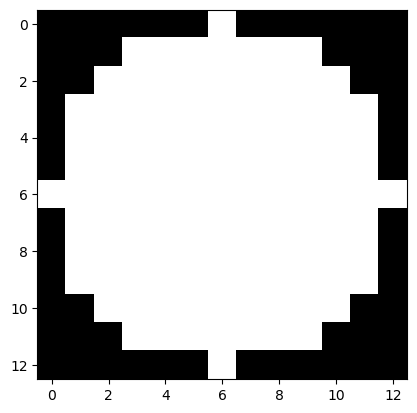

In [15]:
from skimage import morphology

# Structural element, that we will use as a "brush". The parameter is "brush side"
struct_el = morphology.disk(6) # creates a disk-shaped structuring element with a radius of 6 pixels
# This structuring element will be used for morphological operations, such as dilation or erosion, to modify the binary mask

# Display the structuring element
print(struct_el)
plt.imshow(struct_el, cmap='gray')

**Next**

1. Try out different morphological operations with different brushes to verify that they do what you expect. Morpholoical operations:
- erosion 
- dilation
- their combinations (which are also in skimage)

2. Find parameters which visually improve the segmentation.


C:\Users\JForc\AppData\Local\Temp\ipykernel_16592\1332487921.py:5: FutureWarning: `square` is deprecated since version 0.25 and will be removed in version 0.27. Use `skimage.morphology.footprint_rectangle` instead.
  selem_square = morphology.square(5)
C:\Users\JForc\AppData\Local\Temp\ipykernel_16592\1332487921.py:7: FutureWarning: `rectangle` is deprecated since version 0.25 and will be removed in version 0.27. Use `skimage.morphology.footprint_rectangle` instead.
  selem_rectangle = morphology.rectangle(3, 7)


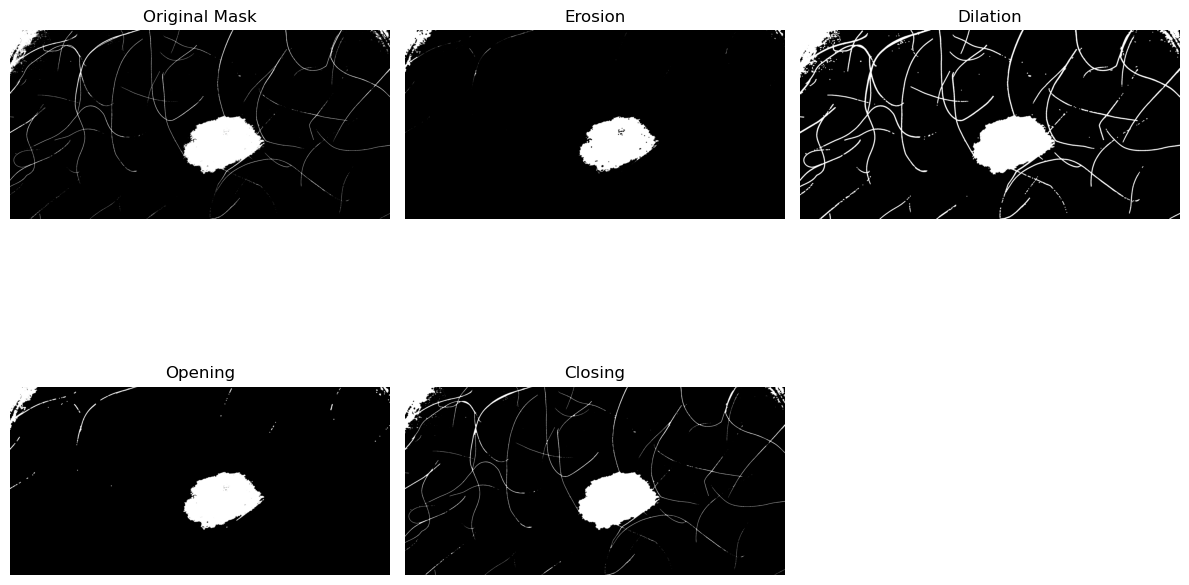

In [25]:
## YOUR SOLUTION

# Choose structuring elements with reasonable size
selem_disk = morphology.disk(5)
selem_square = morphology.square(5)
selem_diamond = morphology.diamond(5)
selem_rectangle = morphology.rectangle(3, 7)
selem_star = morphology.star(5)
selem_octagon = morphology.octagon(3, 2)

# Choose one element for testing (change to compare)
selem = selem_octagon

# Apply operations
eroded = morphology.erosion(mask, selem)
dilated = morphology.dilation(mask, selem)
opened = morphology.opening(mask, selem)
closed = morphology.closing(mask, selem)

# Visualize results
plt.figure(figsize=(12,8))

plt.subplot(2,3,1)
plt.imshow(mask, cmap='gray')
plt.title("Original Mask")
plt.axis('off')

plt.subplot(2,3,2)
plt.imshow(eroded, cmap='gray')
plt.title("Erosion")
plt.axis('off')

plt.subplot(2,3,3)
plt.imshow(dilated, cmap='gray')
plt.title("Dilation")
plt.axis('off')

plt.subplot(2,3,4)
plt.imshow(opened, cmap='gray')
plt.title("Opening")
plt.axis('off')

plt.subplot(2,3,5)
plt.imshow(closed, cmap='gray')
plt.title("Closing")
plt.axis('off')

plt.tight_layout()
plt.show()


1. Do you think there is a best set of parameters? 

2. What might appropriate parameters depend on?

## Filtering

Let's look at how filtering could improve segmentations. Use the gaussian filter from skimage (note the parameters, find a good value of sigma, blurring parameter) and segment the image again.

How do the results differ? Try combining the techniques in some way to achieve a better segmentation overall? Hint: try using combined morphological methods followed by filtering.

(np.float64(-0.5), np.float64(3023.5), np.float64(1499.5), np.float64(-0.5))

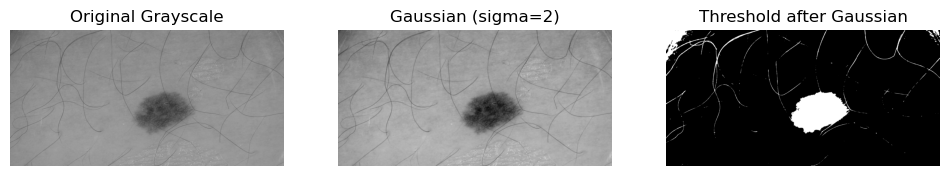

In [30]:
from skimage.filters import gaussian

## YOUR CODE HERE
sigma = 2
blurred = gaussian(gray, sigma=sigma)

thresh_blurred = threshold_otsu(blurred)

mask_gauss = blurred < thresh_blurred

plt.figure(figsize=(12,4))

plt.subplot(1,3,1)
plt.imshow(gray, cmap='gray')
plt.title("Original Grayscale")
plt.axis('off')

plt.subplot(1,3,2)
plt.imshow(blurred, cmap='gray')
plt.title(f"Gaussian (sigma={sigma})")
plt.axis('off')

plt.subplot(1,3,3)
plt.imshow(mask_gauss, cmap='gray')
plt.title("Threshold after Gaussian")
plt.axis('off')



## Combining masks

Now that we have some different options, we can also see how we can combine the advantages of different masks.

Since masks are binary, we can easily create different combinations of multiple ones using simple arithmetic.

Try the following on 2 or more masks:

* Add / subtract
* Multiply
* Minimum, mean or median, maximum

**Questions:**
* Do any of these have the same effect?
* Which binary operations do they correspond to?
* Do we need to do anything with the results to make them "proper" masks?

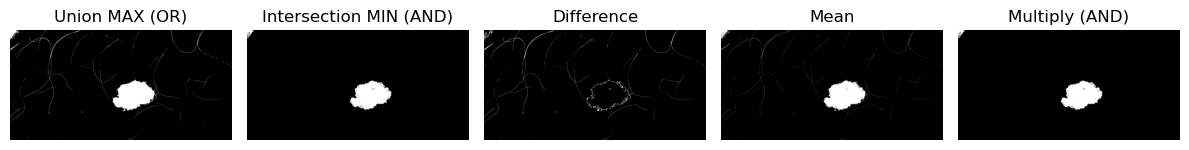

In [ ]:
## SOLUTION 

# Example of two different masks could be:
# noisy = im256 < 120
# good = better_mask defined using morphological operations and blurring

# Logical OR (union) - Maximum


# Logical AND (intersection) - Minimum

# Subtract (difference)

# Mean (majority voting)

# Multiply (AND)

# Display results


## Optional - morphology with OpenCV

You can optionally try similar things with OpenCV, see for example

https://docs.opencv.org/4.x/d9/d61/tutorial_py_morphological_ops.html